<a href="https://colab.research.google.com/github/SanjayS2348553/AiML/blob/main/credit_card_fraud_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


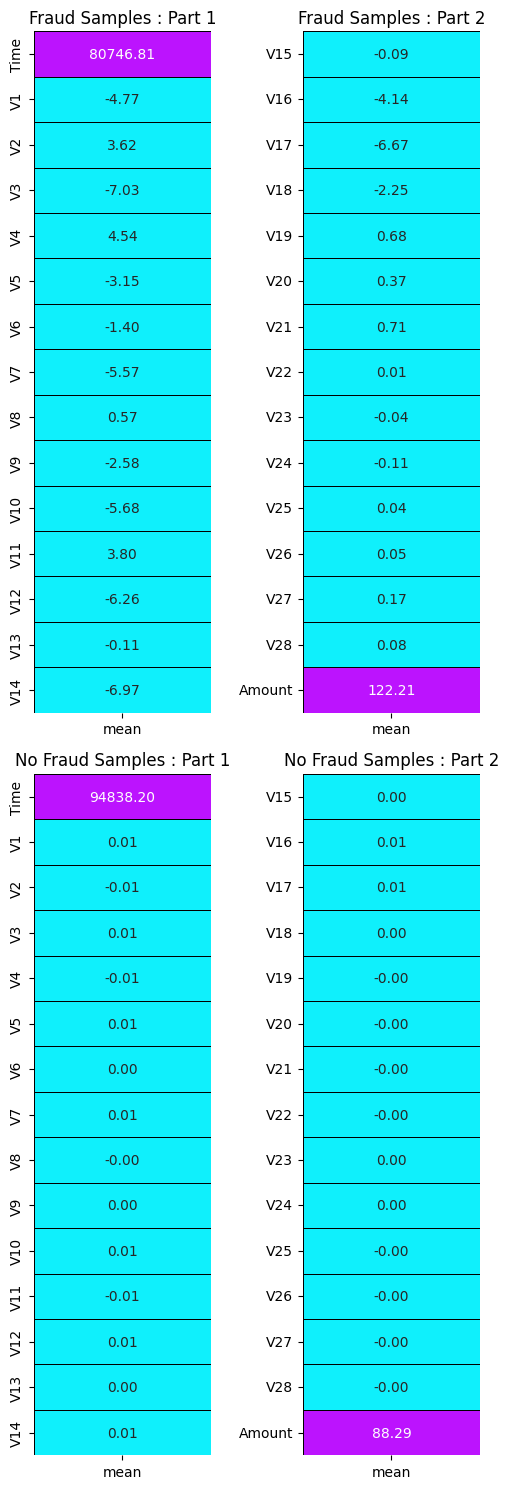

In [ ]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#0FF0FC','#BC13FE']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

In [ ]:
data['Class'] = data['Class'].astype(int)

**Target Variable Visualization (Class) :**


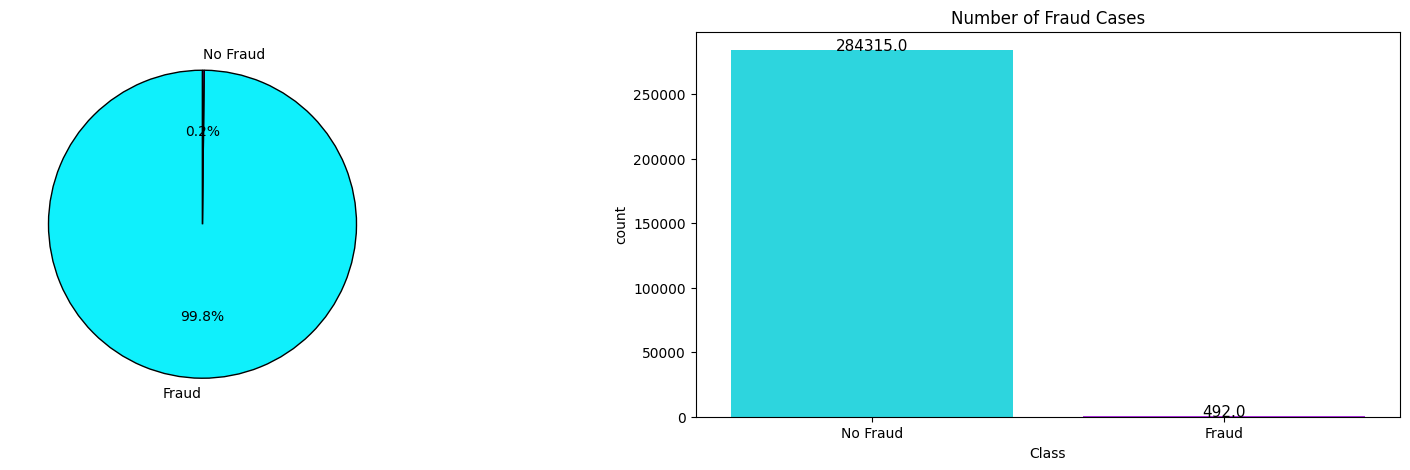

In [ ]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax=sns.countplot(data,x='Class',palette=colors)
# ax = sns.countplot('Class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

The data is clearly highly unbalanced with majority of the transactions being No Fraud.
Due to highly unbalanced data, the classification model will bias its prediction towards the majority class, No Fraud.
Hence, data balancing becomes a crucial part in building a robust model.

**FEATURE SELECTION**

**Correlation Matrix :**

<Axes: >

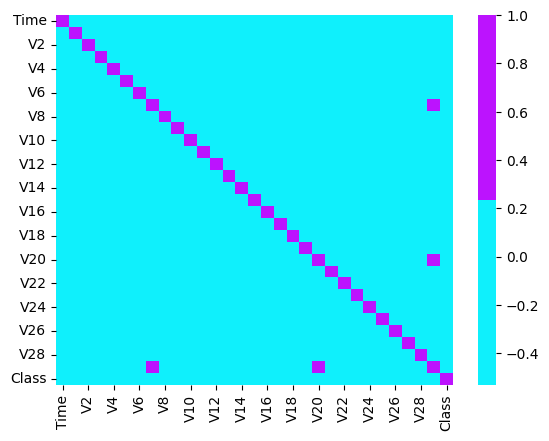

In [ ]:
sns.heatmap(data.corr(),cmap = colors,cbar = True)

* There are too many features in the dataset and it is difficult to understand anything.
*  Hence, we will plot the correlation map only with the target variable.

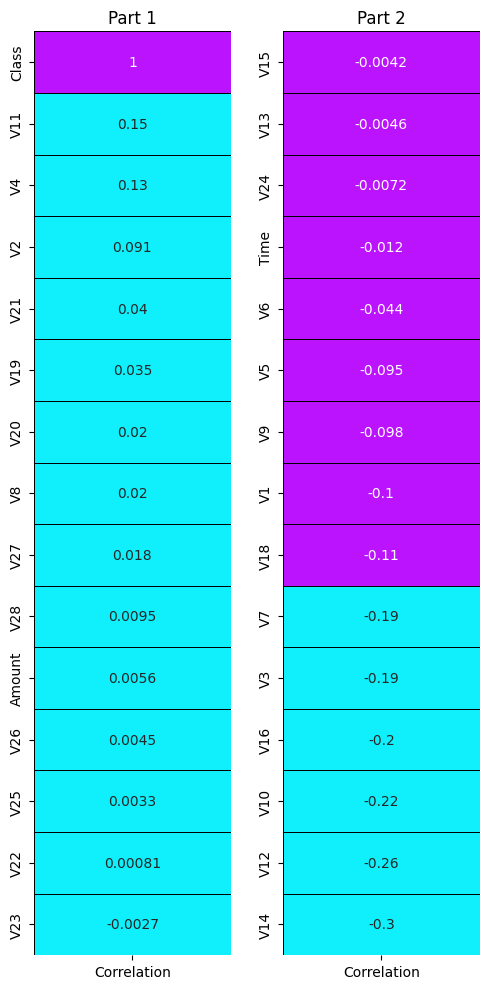

In [ ]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

*  For feature selection, we will exclude the features having correlation values between [-0.1,0.1].
*   V4, V11 are positively correlated and V7, V3, V16, V10, V12, V14, V17 are negatively correlated with the Class feature.



**ANOVA Test :**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

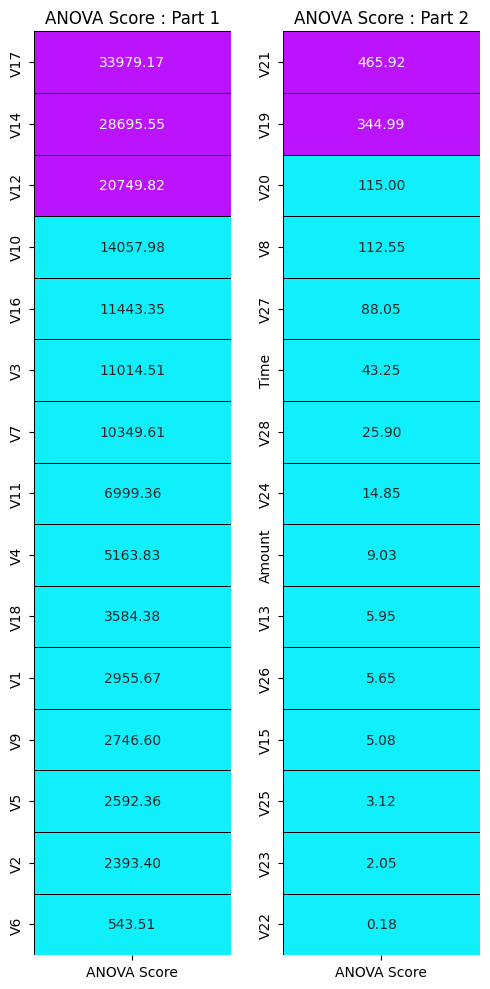

In [ ]:
features = data.loc[:,:'Amount']
target = data.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

* Higher the value of the ANOVA score, higher the importance of that feature with the target variable.
* From the above plot, we will reject features with values less than 50.
* In this case, we will create 2 models based on features selected from the Correlation Plot & ANOVA Score.

**Dataset for Model based on Correlation Plot :**

In [ ]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


**Dataset for Model based on ANOVA Score :**

In [ ]:
df2 = data.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


**BALANCING DATA:**
* In order to cope with unbalanced data, there are 2 options :
    * Undersampling : Trim down the majority samples of the target variable.
    * Oversampling : Increase the minority samples of the target variable to the majority samples.
*  For best performances, we will use the combination of undersampling and oversampling.
*  First, we will undersample the majority samples and it is followed by oversampling minority samples.
*   For data balancing, we will use imblearn.
*   PIP statement : pip install imbalanced-learn




In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

**Data Balancing for Model based on Correlation Plot :**

In [ ]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4920, 1: 2460})

**Data Balancing for Model based on ANOVA Score :**

In [ ]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 4920, 1: 2460})

### **Calculation for Data Balancing :**

- **Sampling Strategy** : It is a ratio which is the common paramter for oversampling and undersampling.
- **Sampling Strategy** : **( Samples of Minority Class ) / ( Samples of Majority Class )**


- In this case,

    - **Majority Class : No Fraud Cases** : 284315 samples
    - **Minority Class : Fraud Cases** : 492 samples


### **Undersampling : Trim down the majority class samples**

- Sampling_Strategy = 0.1
- 0.1 = ( 492 ) / Majority Class Samples
- After undersampling,

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 492 samples


### **Oversampling : Increase the minority class samples**

- Sampling_Strategy = 0.5
- 0.5 = ( Minority Class Samples ) / 4920
- After oversampling,

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 2460 samples
    

- **Final Class Samples :**

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 2460 samples


- For imbalanced datasets, we **duplicate the data** to deal with the potential bias in the predictions.
- Due to this duplication process, we are using **synthetic data** for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
- Thus, evaluating models using **accuracy** will be misleading. Instead, we will go for **confusion matrix, ROC-AUC graph and ROC-AUC score** for model evaluation.

**MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

- Splitting the data into **80 - 20 train - test** groups.

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    # plot_roc_curve(classifier, x_test,y_test)
    # plt.title('ROC_AUC_Plot')
    # plt.show()
    svc_disp=RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    return svc_disp

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### **1] Logistic Regression :**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

In [ ]:
classifier_lr

LogisticRegression(C=10, random_state=0)

Cross Validation Score :  97.94%
ROC_AUC Score :  93.60%


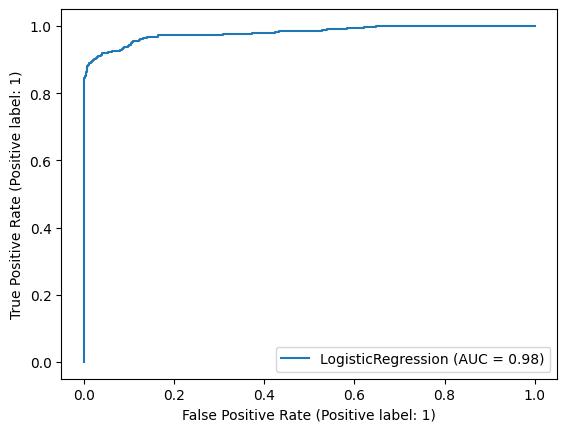

In [ ]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.97      0.88      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.95      0.95      0.95      1476



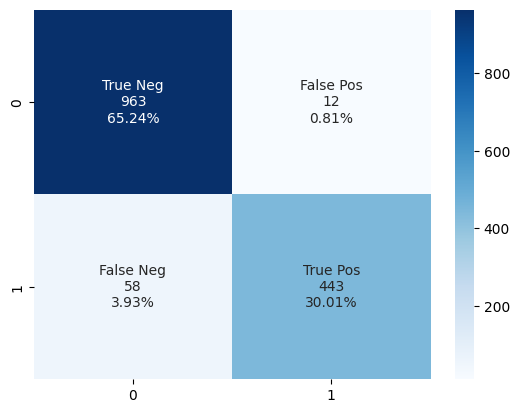

In [ ]:
model_evaluation(classifier_lr,x_test1,y_test1)

#### **ANOVA Score :**

Cross Validation Score :  98.51%
ROC_AUC Score :  94.75%


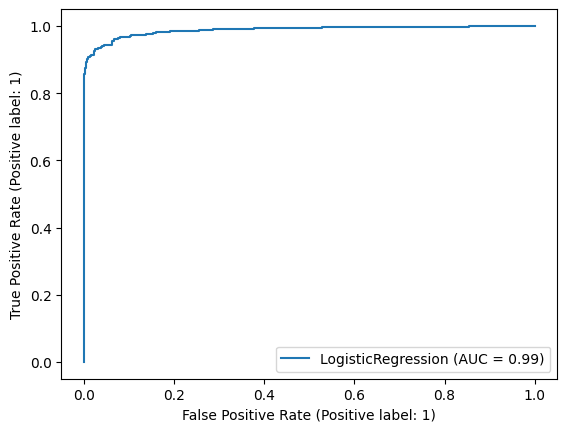

In [ ]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.98      0.91      0.94       501

    accuracy                           0.96      1476
   macro avg       0.96      0.95      0.96      1476
weighted avg       0.96      0.96      0.96      1476



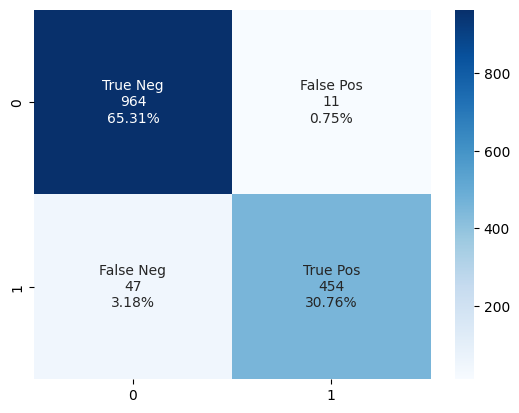

In [ ]:
model_evaluation(classifier_lr,x_test2,y_test2)

### **2] Support Vector Classifier :**

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Cross Validation Score :  97.89%
ROC_AUC Score :  93.30%


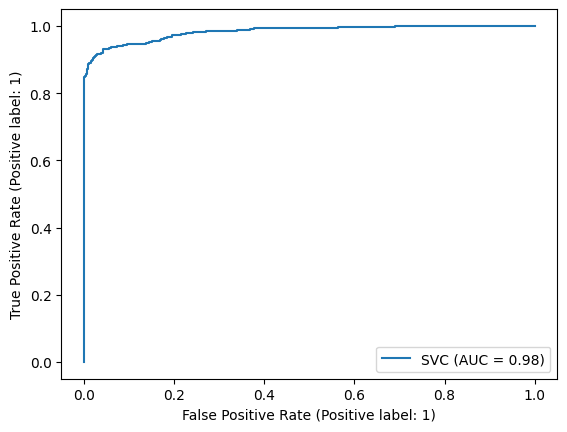

In [ ]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.98      0.87      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



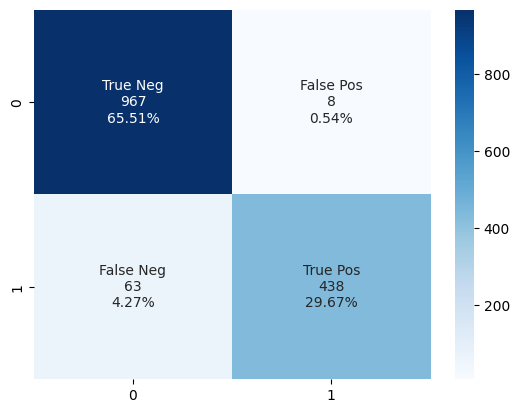

In [ ]:
model_evaluation(classifier_svc,x_test1,y_test1)

#### **ANOVA Score :**

Cross Validation Score :  98.47%
ROC_AUC Score :  94.40%


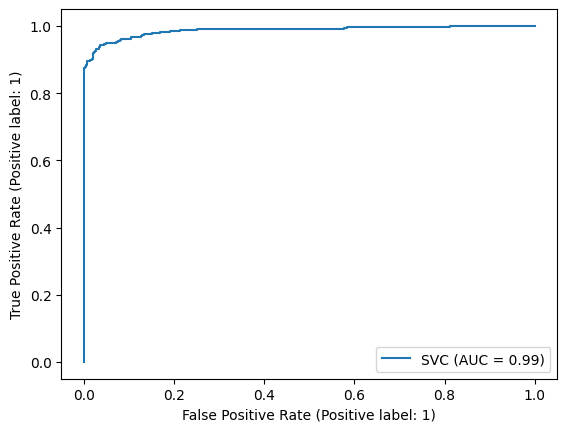

In [ ]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.99      0.89      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



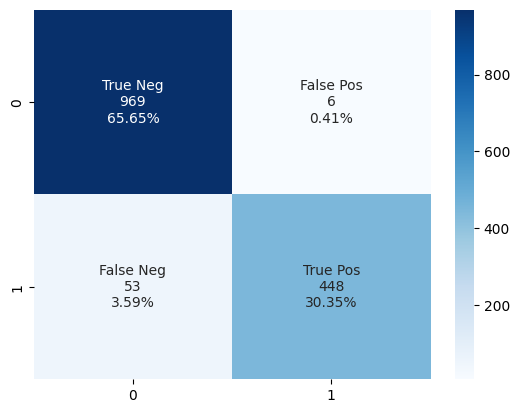

In [ ]:
model_evaluation(classifier_svc,x_test2,y_test2)

### **3] Decision Tree Classifier :**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  96.15%
ROC_AUC Score :  93.61%


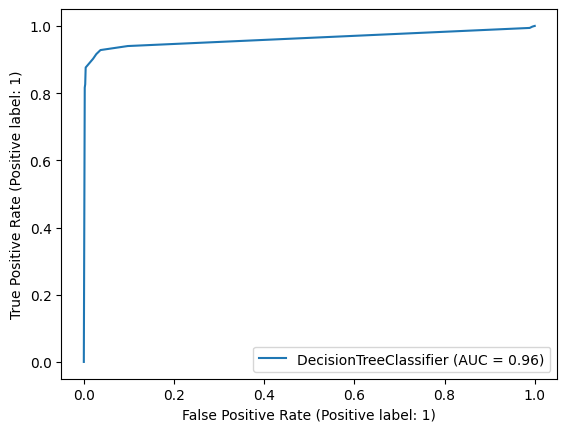

In [ ]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       0.99      0.88      0.93       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.95      1476



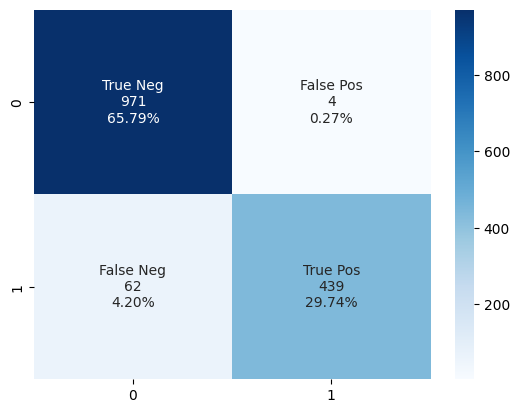

In [ ]:
model_evaluation(classifier_dt,x_test1,y_test1)

#### **ANOVA Score :**

Cross Validation Score :  97.43%
ROC_AUC Score :  94.28%


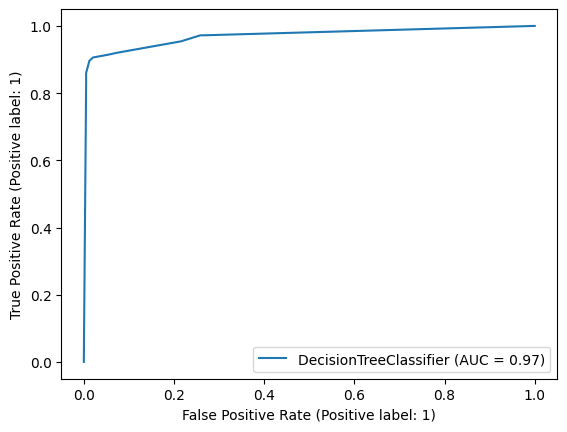

In [ ]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       975
           1       0.96      0.91      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.95      0.95      0.95      1476



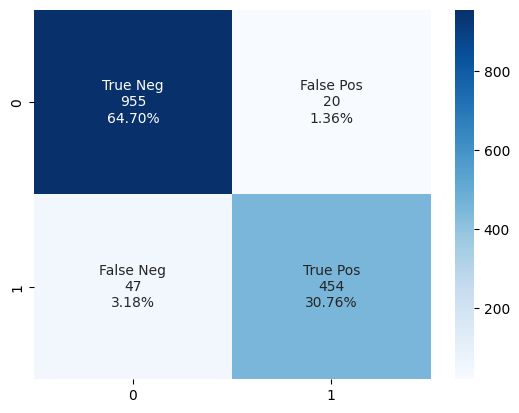

In [ ]:
model_evaluation(classifier_dt,x_test2,y_test2)

### **4] Random Forest Classifier :**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  97.84%
ROC_AUC Score :  93.46%


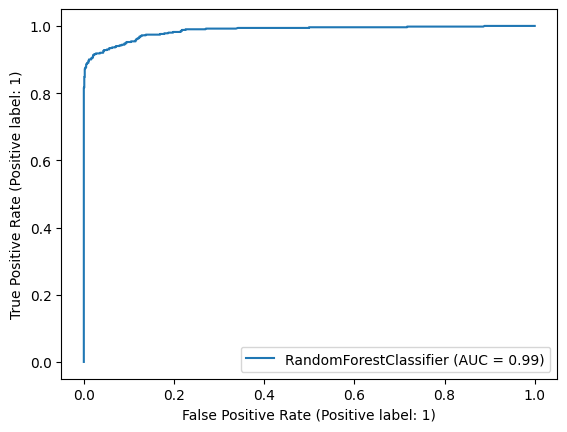

In [ ]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       0.99      0.87      0.93       501

    accuracy                           0.95      1476
   macro avg       0.97      0.93      0.95      1476
weighted avg       0.96      0.95      0.95      1476



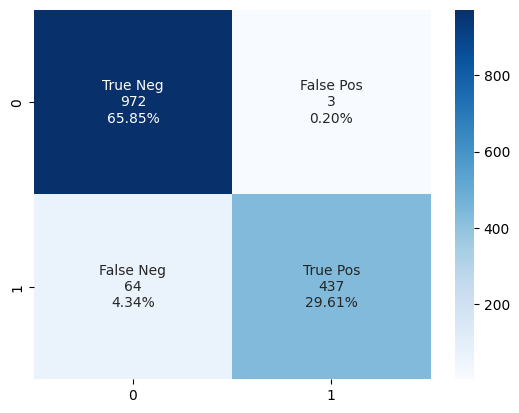

In [ ]:
model_evaluation(classifier_rf,x_test1,y_test1)

#### **ANOVA Score :**

Cross Validation Score :  98.34%
ROC_AUC Score :  93.51%


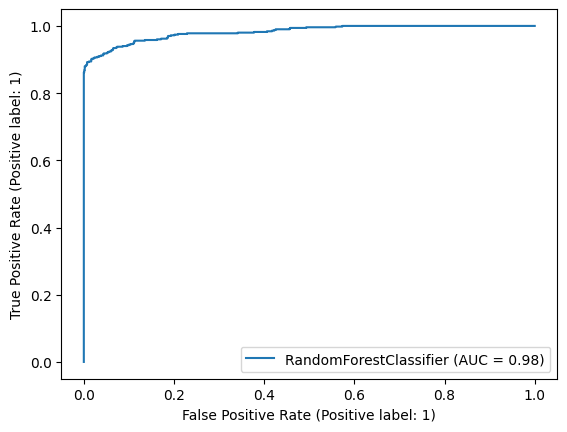

In [ ]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       1.00      0.87      0.93       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.95      1476



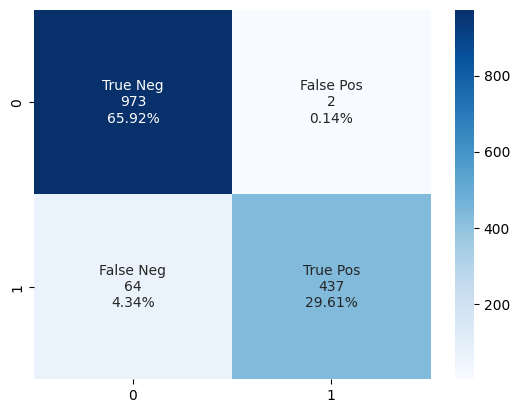

In [ ]:
model_evaluation(classifier_rf,x_test2,y_test2)

### **5] K-Nearest Neighbors :**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Cross Validation Score :  99.26%
ROC_AUC Score :  97.97%


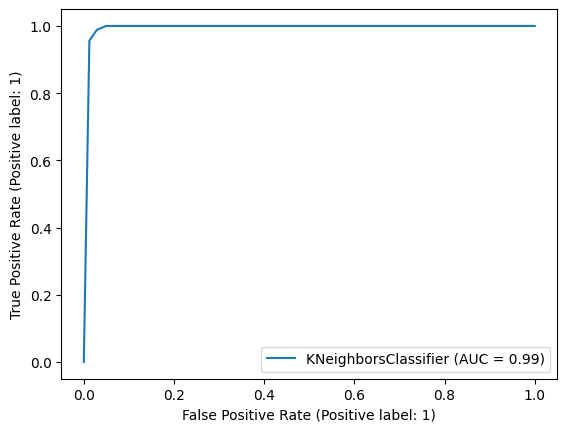

In [ ]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       975
           1       0.95      0.99      0.97       501

    accuracy                           0.98      1476
   macro avg       0.97      0.98      0.97      1476
weighted avg       0.98      0.98      0.98      1476



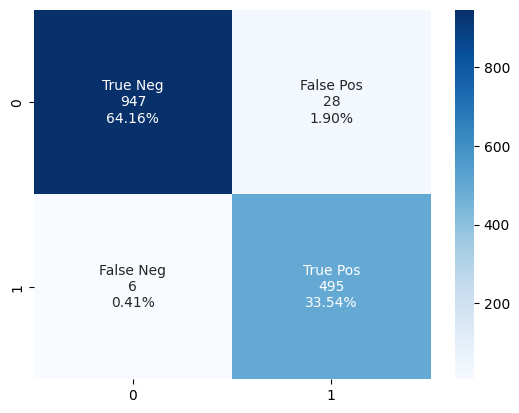

In [ ]:
model_evaluation(classifier_knn,x_test1,y_test1)

#### **ANOVA Score :**

Cross Validation Score :  99.44%
ROC_AUC Score :  98.53%


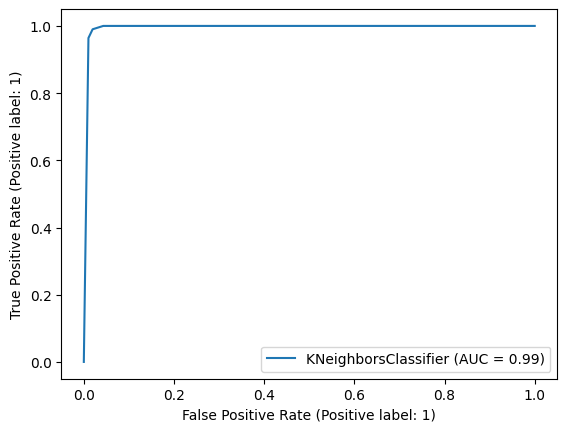

In [ ]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       975
           1       0.96      0.99      0.98       501

    accuracy                           0.98      1476
   macro avg       0.98      0.99      0.98      1476
weighted avg       0.98      0.98      0.98      1476



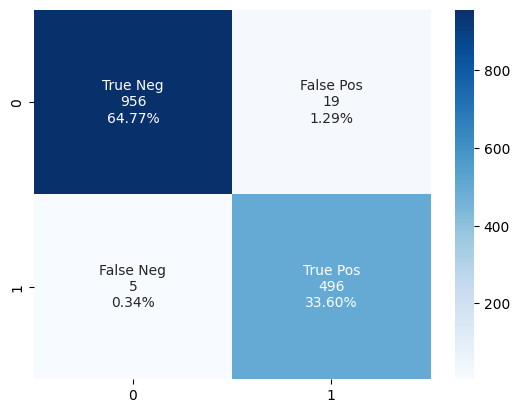

In [ ]:
model_evaluation(classifier_knn,x_test2,y_test2)

#Un Supervised Algorithim: Isolation Forest

In [ ]:
# Split data into Inliers and Outliers
ins = data[data['Class'] == 0].drop('Class', axis=1)
outs = data[data['Class'] == 1].drop('Class', axis=1)

In [ ]:
state = 42
isolation_forest = IsolationForest(random_state=state)
isolation_forest.fit(ins)

normal_isf = isolation_forest.predict(ins)
fraud_isf = isolation_forest.predict(outs)

In [ ]:
def normal_accuracy(values):

    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)

    return accuracy

def fraud_accuracy(values):

    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)

    return accuracy

In [ ]:
in_accuracy_isf = normal_accuracy(normal_isf)
out_accuracy_isf = fraud_accuracy(fraud_isf)
print("Accuracy in Detecting Normal Cases:", in_accuracy_isf)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_isf)

Accuracy in Detecting Normal Cases: 0.9603
Accuracy in Detecting Fraud Cases: 0.8374


# Modeling - Local Outlier Factor

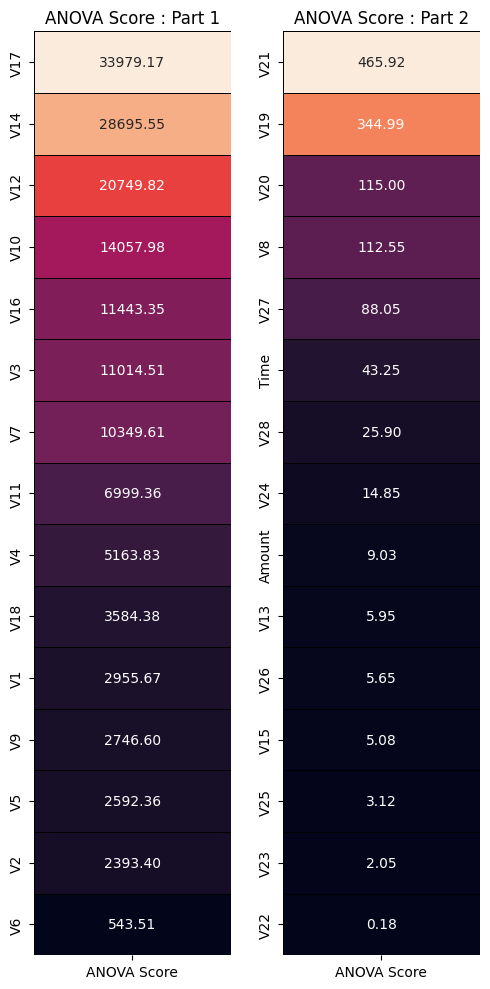

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = data.loc[:, :'Amount']
target = data.loc[:, 'Class']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])
featureScores = featureScores.sort_values(ascending=False, by='ANOVA Score')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 10))

plt.subplot(1, 2, 1)
sns.heatmap(featureScores.iloc[:15, :], annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1, 2, 2)
sns.heatmap(featureScores.iloc[15:30, :], annot=True,  linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad=2)
plt.show()

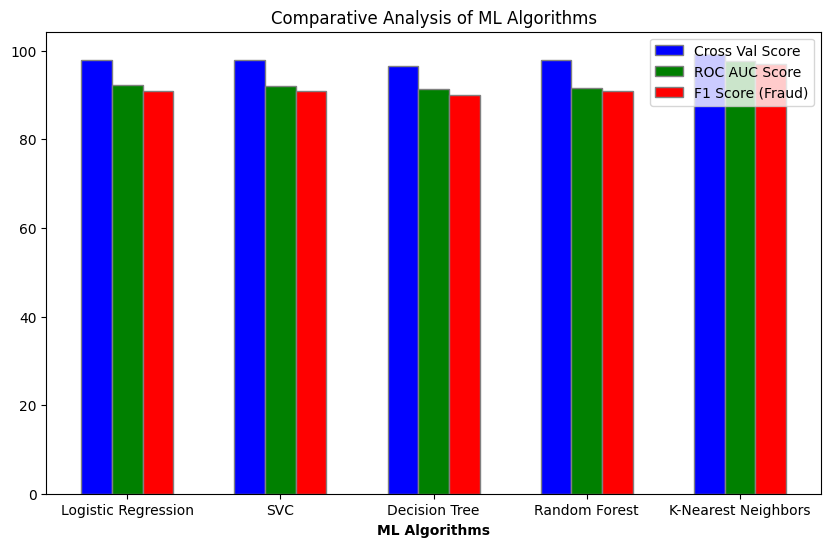

In [ ]:
# Data
algorithms = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
cross_val_scores = [98.01, 97.94, 96.67, 97.84, 99.34]
roc_auc_scores = [92.35, 92.10, 91.36, 91.71, 97.63]
f1_scores_fraud = [91, 91, 90, 91, 97]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Bar positions
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Bar plots
plt.bar(r1, cross_val_scores, color='b', width=bar_width, edgecolor='grey', label='Cross Val Score')
plt.bar(r2, roc_auc_scores, color='g', width=bar_width, edgecolor='grey', label='ROC AUC Score')
plt.bar(r3, f1_scores_fraud, color='r', width=bar_width, edgecolor='grey', label='F1 Score (Fraud)')

# X-axis labels and title
plt.xlabel('ML Algorithms', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)
plt.title('Comparative Analysis of ML Algorithms')

# Legend
plt.legend()

# Show the plot
plt.show()

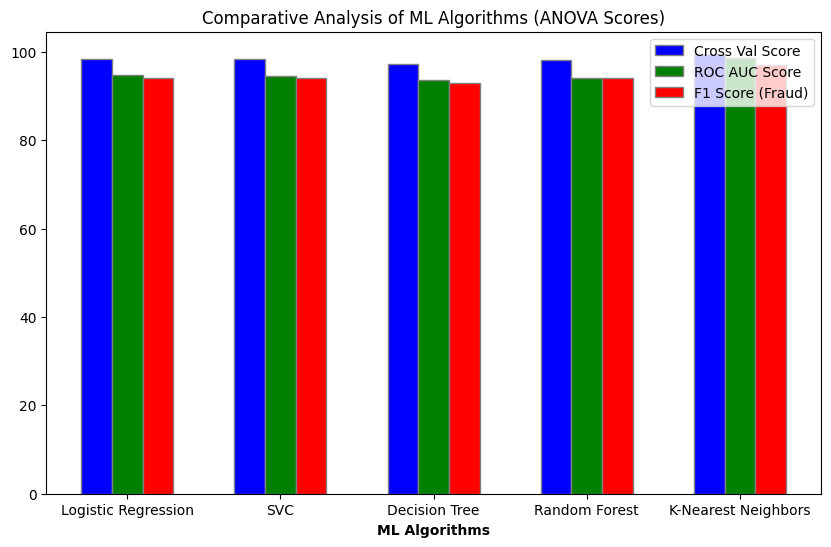

In [ ]:
# Data
algorithms = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
cross_val_scores = [98.45, 98.32, 97.13, 98.20, 99.54]
roc_auc_scores = [94.69, 94.40, 93.69, 94.06, 98.47]
f1_scores_fraud = [94, 94, 93, 94, 97]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Bar positions
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Bar plots
plt.bar(r1, cross_val_scores, color='b', width=bar_width, edgecolor='grey', label='Cross Val Score')
plt.bar(r2, roc_auc_scores, color='g', width=bar_width, edgecolor='grey', label='ROC AUC Score')
plt.bar(r3, f1_scores_fraud, color='r', width=bar_width, edgecolor='grey', label='F1 Score (Fraud)')

# X-axis labels and title
plt.xlabel('ML Algorithms', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)
plt.title('Comparative Analysis of ML Algorithms (ANOVA Scores)')

# Legend
plt.legend()

# Show the plot
plt.show()


### **ML Alogrithm Results Table :**

#### **Results Table for models based on Confusion matrix :**

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.01%|92.35%|91%|
|2|Support Vector Classifier|97.94%|92.10%|91%|
|3|Decision Tree Classifier|96.67%|91.36%|90%|
|4|Random Forest Classifier|97.84%|91.71%|91%|
|5|K-Nearest Neighbors|99.34%|97.63%|97%|

#### **Results Table for models based on ANOVA Score :**

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.45%|94.69%|94%|
|2|Support Vector Classifier|98.32%|94.40%|94%|
|3|Decision Tree Classifier|97.13%|93.69%|93%|
|4|Random Forest Classifier|98.20%|94.06%|94%|
|5|K-Nearest Neighbors|99.54%|98.47%|97%|

<div style="color:white;display:fill;border-radius:8px;
            background-color:#CCFF00;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1562C1'>CONCLUSION</span></b></b></p>
</div>

- This is a great dataset to learn about  classification problem with unbalanced data.


- As the features are disguised, feature selection cannot be assisted based on the domain knowledge of the topic. Statistical tests hold the complete importance to select features for modeling.  


- Due to the use of SMOTE analysis for balancing the data, the models trained on this synthetic data cannot be evaluated using accuracy. Hence, we resort to Cross Validation Score and ROC-AUC Score for model evaluation.